In [77]:
#importing modules
import pandas as pd
import os
import matplotlib.pyplot as plt

In [22]:
#combining all sales csv's into one file
files = [file for file in os.listdir(r'C:\Users\Tyler\Desktop\Projects\Other\Sales Data\PandasDataScienceTasksmaster\SalesAnalysis\SalesData')]

dataframe = pd.DataFrame()

for file in files:
    df = pd.read_csv(r'C:\Users\Tyler\Desktop\Projects\Other\Sales Data\PandasDataScienceTasksmaster\SalesAnalysis\SalesData/'+file)
    dataframe = pd.concat([df, dataframe])

dataframe.to_csv("combined_months",index=False)

In [26]:
#loading in data to dataframe
df = pd.read_csv(r'C:\Users\Tyler\Desktop\Projects\Other\Sales Data\combined_months')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [31]:
#finding missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Month,545,0.002917
Purchase Address,545,0.002917
Order Date,545,0.002917
Price Each,545,0.002917
Quantity Ordered,545,0.002917
Product,545,0.002917
Order ID,545,0.002917


In [34]:
#finding NaN's
nan_df = df[df.isna().any(axis=1)]
nan_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#dropping all rows with nans
df = df.dropna(how='all')
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Month,0,0.0
Purchase Address,0,0.0
Order Date,0,0.0
Price Each,0,0.0
Quantity Ordered,0,0.0
Product,0,0.0
Order ID,0,0.0


In [37]:
#dropping the duplicate headers that were brought along by merging csv files
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
6204,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
8338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
8644,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
9325,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
9502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [38]:
#only selecting lines without 'Or' in the Order Date column
df = df[df['Order Date'].str[0:2] != 'Or']

In [100]:
#correcting datatypes of columns 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 16 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
Month               185950 non-null int64
Year                185950 non-null int64
Day                 185950 non-null int64
Time                185950 non-null object
Street              185950 non-null object
City                185950 non-null object
State               185950 non-null object
Zip                 185950 non-null object
CityState           185950 non-null object
SalesRev            185950 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(9)
memory usage: 28.4+ MB


In [49]:
#extracting time data from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Time'] = df['Order Date'].dt.time

In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,17,14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,29,10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,16,17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,27,07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,1,19:03:00


In [76]:
#splitting location data into separate columns
df['Street'] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['StateZip'] = df['Purchase Address'].apply(lambda x: x.split(',')[2]) 
df['State'] = df['StateZip'].apply(lambda x: x.split(' ')[1])
df['Zip'] = df['StateZip'].apply(lambda x: x.split(' ')[-1])
df.drop(['StateZip'],axis=1,inplace=True)
df['CityState'] = df[['City','State']].apply(lambda x :'{}, {}'.format(x[0],x[1]), axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Time,Street,City,State,Zip,CityState
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,17,14:44:00,380 North St,Los Angeles,CA,90001,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,29,10:19:00,511 8th St,Austin,TX,73301,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,16,17:48:00,151 Johnson St,Los Angeles,CA,90001,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,27,07:52:00,355 Hickory St,Seattle,WA,98101,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,1,19:03:00,125 5th St,Atlanta,GA,30301,"Atlanta, GA"


In [89]:
#creating SalesRev column as a product of Quantity and Price
df['SalesRev'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Time,Street,City,State,Zip,CityState,SalesRev
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,17,14:44:00,380 North St,Los Angeles,CA,90001,"Los Angeles, CA",15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,29,10:19:00,511 8th St,Austin,TX,73301,"Austin, TX",23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,16,17:48:00,151 Johnson St,Los Angeles,CA,90001,"Los Angeles, CA",11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,27,07:52:00,355 Hickory St,Seattle,WA,98101,"Seattle, WA",149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,1,19:03:00,125 5th St,Atlanta,GA,30301,"Atlanta, GA",11.95


Text(0.5, 1.0, 'Sales Revenue by Month')

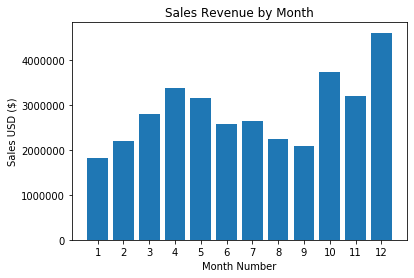

In [106]:
#visualizing results by month
results = df.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['SalesRev'])
plt.xticks(months)
plt.ylabel('Sales USD ($)')
plt.xlabel('Month Number')
plt.title('Sales Revenue by Month')


Text(0.5, 1.0, 'Sales Revenue by Product')

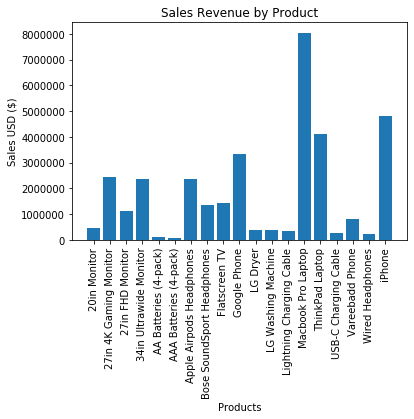

In [108]:
products = df.groupby('Product')
quantity_ordered = products.sum()['Quantity Ordered']
product_revenue = products.sum()['SalesRev']

ind_products = [product for product, df in products]

plt.bar(ind_products,product_revenue)
plt.xticks(ind_products, rotation='vertical', size=10)
plt.ylabel('Sales USD ($)')
plt.xlabel('Products')
plt.title('Sales Revenue by Product')

Text(0.5, 1.0, 'Total Quantity Solid by Product')

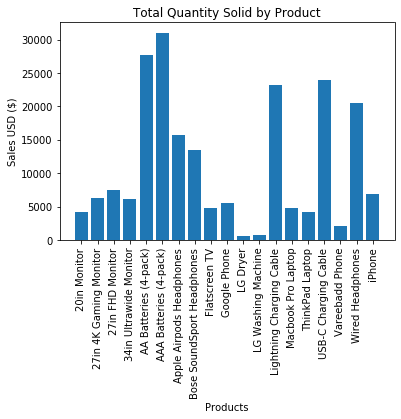

In [109]:
products = df.groupby('Product')
quantity_ordered = products.sum()['Quantity Ordered']
product_revenue = products.sum()['SalesRev']

ind_products = [product for product, df in products]

plt.bar(ind_products,quantity_ordered)
plt.xticks(ind_products, rotation='vertical', size=10)
plt.ylabel('Sales USD ($)')
plt.xlabel('Products')
plt.title('Total Quantity Solid by Product')